Accuracy of Logistic Regression on test data: 0.9659192825112107
Accuracy of SVM on test data: 0.9820627802690582
Accuracy of MNB on test data: 0.9730941704035875
SVM: Ham mail


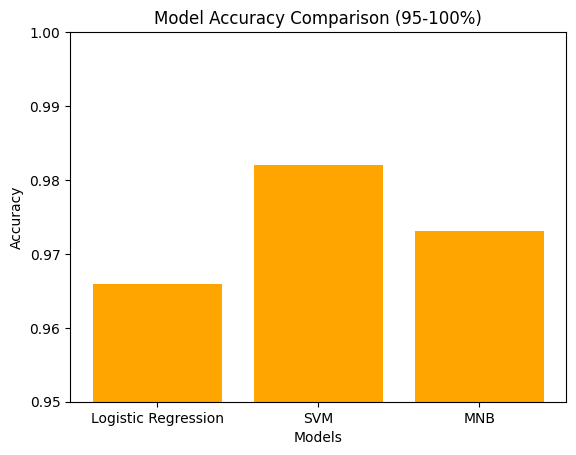

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Loading the data from a CSV file to a pandas data frame
raw_mail_data = pd.read_csv('/content/mail_data.csv')

# Replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Label spam mail as 0 and ham mail as 1
mail_data['Category'] = (mail_data['Category'] == 'spam').astype(int)

# Separating the data as texts and labels
x = mail_data['Message']
y = mail_data['Category']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_features = tfidf_vectorizer.fit_transform(x_train)
x_test_features = tfidf_vectorizer.transform(x_test)

# Convert y_train and y_test values to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_features, y_train)

# Prediction on test data using Logistic Regression
prediction_on_test_data = logistic_regression_model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy of Logistic Regression on test data:', accuracy_on_test_data)

# Create and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0, random_state=3)
svm_model.fit(x_train_features, y_train)

# Prediction on test data using SVM
svm_prediction_on_test_data = svm_model.predict(x_test_features)
svm_accuracy_on_test_data = accuracy_score(y_test, svm_prediction_on_test_data)
print('Accuracy of SVM on test data:', svm_accuracy_on_test_data)

# Create and train the Multinomial Naive Bayes (MNB) model
mnb_model = MultinomialNB()
mnb_model.fit(x_train_features, y_train)

# Prediction on test data using MNB
mnb_prediction_on_test_data = mnb_model.predict(x_test_features)
mnb_accuracy_on_test_data = accuracy_score(y_test, mnb_prediction_on_test_data)
print('Accuracy of MNB on test data:', mnb_accuracy_on_test_data)

# Test the SVM model on the input email
input_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
input_data_features = tfidf_vectorizer.transform(input_mail)

# Making predictions using the SVM model
svm_prediction = svm_model.predict(input_data_features)

if svm_prediction[0] == 1:
    print("SVM: Ham mail")
else:
    print("SVM: Spam mail")

# Plotting model accuracy comparison with y-axis limits set to 95% to 100% and orange bars
model_names = ['Logistic Regression', 'SVM', 'MNB']
test_accuracies = [accuracy_on_test_data, svm_accuracy_on_test_data, mnb_accuracy_on_test_data]

plt.ylim(0.95, 1.0)  # Set y-axis limits
plt.bar(model_names, test_accuracies, color='orange')  # Set bar color to orange
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (95-100%)')
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
analyzer = SentimentIntensityAnalyzer()


In [ ]:
input_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
sentiment_scores = [analyzer.polarity_scores(mail) for mail in input_mail]

for i, sentiment in enumerate(sentiment_scores):
    print("Input Mail {}: ".format(i + 1))
    print("Sentiment Analysis Scores:")
    print(sentiment)
    if sentiment['compound'] >= 0.05:
        print("Sentiment: Positive")
    elif sentiment['compound'] <= -0.05:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")


Input Mail 1: 
Sentiment Analysis Scores:
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.7088}
Sentiment: Positive


In [ ]:
input_mail = ["I see a cup of coffee animation"]
sentiment_scores = [analyzer.polarity_scores(mail) for mail in input_mail]

for i, sentiment in enumerate(sentiment_scores):
    print("Input Mail {}: ".format(i + 1))
    print("Sentiment Analysis Scores:")
    print(sentiment)
    if sentiment['compound'] >= 0.05:
        print("Sentiment: Positive")
    elif sentiment['compound'] <= -0.05:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")


Input Mail 1: 
Sentiment Analysis Scores:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral


In [ ]:
input_mail = ["Great! I hope you like your man well endowed. I am &lt;#&gt; inches..."]
sentiment_scores = [analyzer.polarity_scores(mail) for mail in input_mail]

for i, sentiment in enumerate(sentiment_scores):
    print("Input Mail {}: ".format(i + 1))
    print("Sentiment Analysis Scores:")
    print(sentiment)
    if sentiment['compound'] >= 0.05:
        print("Sentiment: Positive")
    elif sentiment['compound'] <= -0.05:
        print("Sentiment: Negative")
    else:
        print("Sentiment: Neutral")


Input Mail 1: 
Sentiment Analysis Scores:
{'neg': 0.0, 'neu': 0.371, 'pos': 0.629, 'compound': 0.8977}
Sentiment: Positive


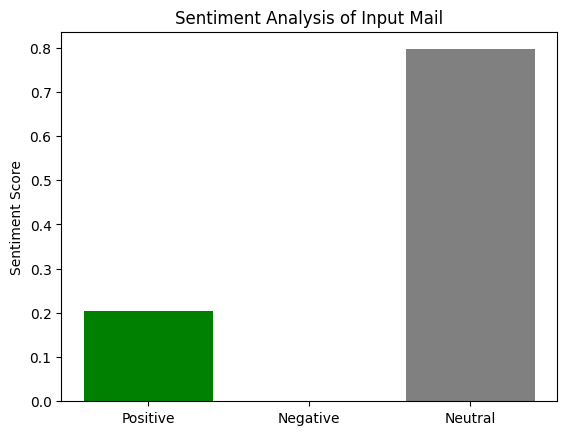

In [ ]:
import matplotlib.pyplot as plt

# Sample input mail
input_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

# Analyze sentiment using VADER
sentiment_scores = [analyzer.polarity_scores(mail) for mail in input_mail]

# Extract sentiment scores
positive_scores = [score['pos'] for score in sentiment_scores]
negative_scores = [-score['neg'] for score in sentiment_scores]  # Use negative values for negative scores
neutral_scores = [score['neu'] for score in sentiment_scores]

# Labels for the sentiment categories
categories = ['Positive', 'Negative', 'Neutral']

# Values for the sentiment categories
scores = [sum(positive_scores), sum(negative_scores), sum(neutral_scores)]

# Create a bar chart
plt.bar(categories, scores, color=['green', 'red', 'gray'])
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Input Mail')

# Display the graph
plt.show()


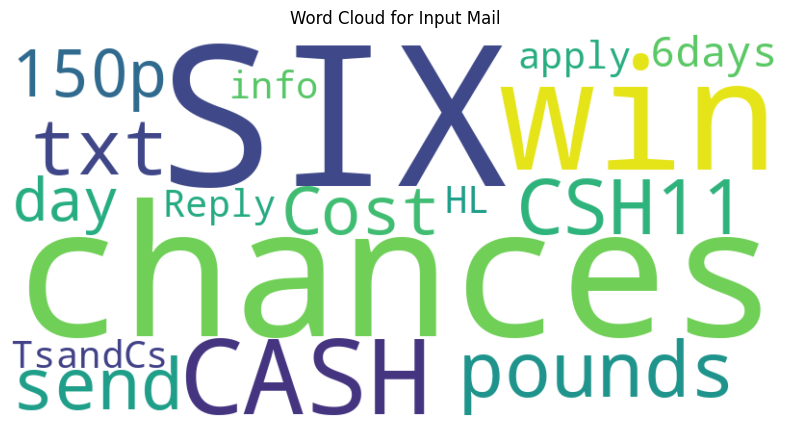

In [ ]:
from wordcloud import WordCloud

# Sample input mail
input_mail = "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"

# Generate a word cloud from the input mail
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(input_mail)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Input Mail')
plt.show()


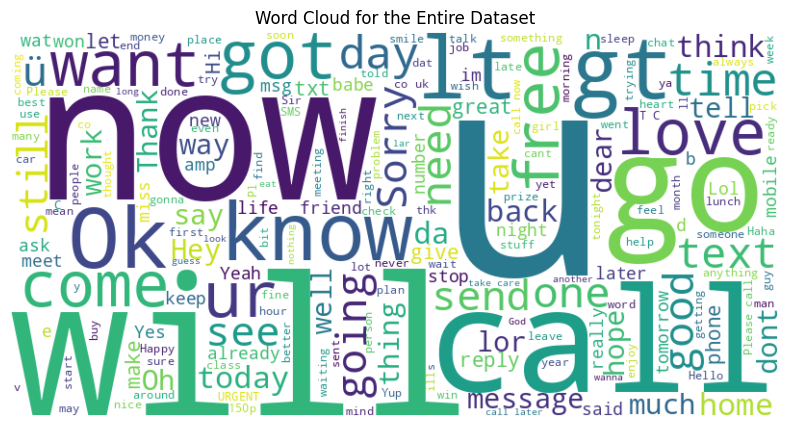

In [ ]:
from wordcloud import WordCloud

# Combine all the text messages in the dataset
all_text = ' '.join(x)

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Entire Dataset')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy of Logistic Regression on test data: 0.9650224215246637
Accuracy of SVM on test data: 0.9856502242152466
Accuracy of MNB on test data: 0.9695067264573991
SVM: Ham mail


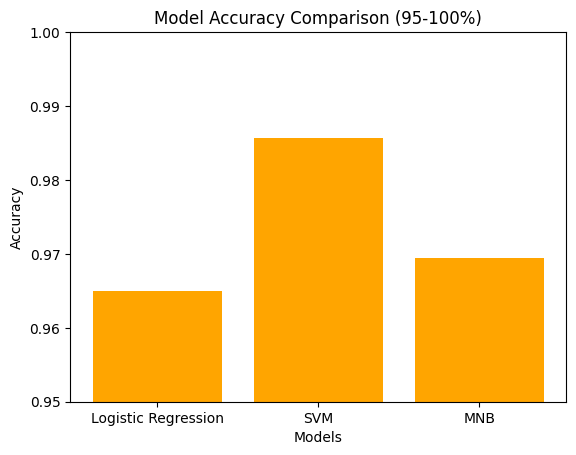

Sentiment Analysis Scores:
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.7088}
Sentiment: Positive


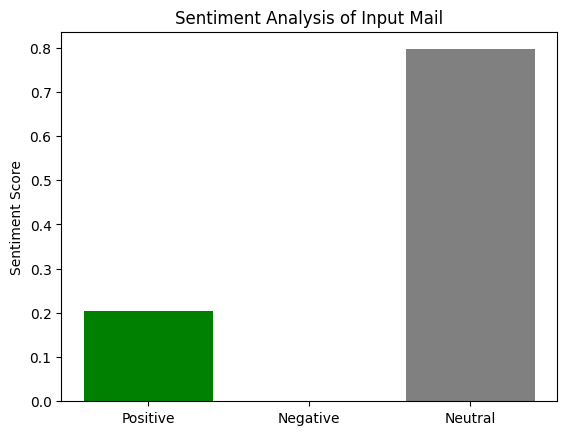

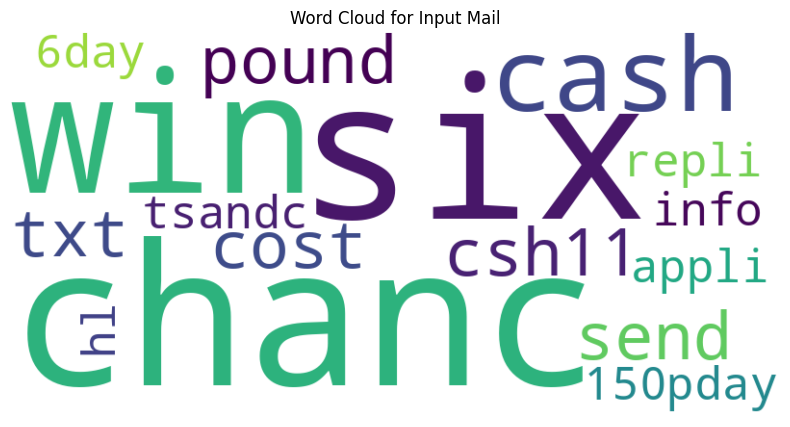

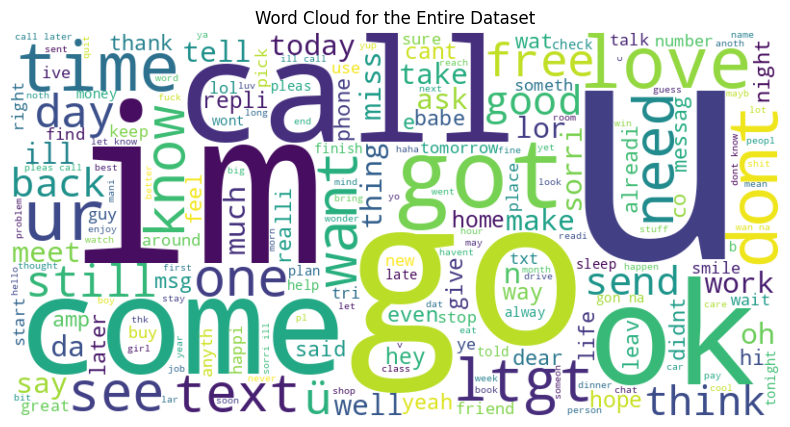

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function to clean text
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    words = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming (optional)
    words = [stemmer.stem(word) for word in words]

    # Rejoin the cleaned words into a string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Loading the data from a CSV file to a pandas data frame
raw_mail_data = pd.read_csv('/content/mail_data.csv')

# Replace the null values with a null string
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data), '')

# Label spam mail as 0 and ham mail as 1
mail_data['Category'] = (mail_data['Category'] == 'spam').astype(int)

# Separating the data as texts and labels
x = mail_data['Message']
y = mail_data['Category']

# Clean the email text data
x = x.apply(clean_text)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_features = tfidf_vectorizer.fit_transform(x_train)
x_test_features = tfidf_vectorizer.transform(x_test)

# Convert y_train and y_test values to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_features, y_train)

# Prediction on test data using Logistic Regression
prediction_on_test_data = logistic_regression_model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy of Logistic Regression on test data:', accuracy_on_test_data)

# Create and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0, random_state=3)
svm_model.fit(x_train_features, y_train)

# Prediction on test data using SVM
svm_prediction_on_test_data = svm_model.predict(x_test_features)
svm_accuracy_on_test_data = accuracy_score(y_test, svm_prediction_on_test_data)
print('Accuracy of SVM on test data:', svm_accuracy_on_test_data)

# Create and train the Multinomial Naive Bayes (MNB) model
mnb_model = MultinomialNB()
mnb_model.fit(x_train_features, y_train)

# Prediction on test data using MNB
mnb_prediction_on_test_data = mnb_model.predict(x_test_features)
mnb_accuracy_on_test_data = accuracy_score(y_test, mnb_prediction_on_test_data)
print('Accuracy of MNB on test data:', mnb_accuracy_on_test_data)

# Test the SVM model on the input email
input_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
input_mail = input_mail[0]  # Take the first element of the list

# Clean the input email text
input_mail_cleaned = clean_text(input_mail)

# Create TF-IDF features for the input email
input_data_features = tfidf_vectorizer.transform([input_mail_cleaned])

# Making predictions using the SVM model
svm_prediction = svm_model.predict(input_data_features)

if svm_prediction[0] == 1:
    print("SVM: Ham mail")
else:
    print("SVM: Spam mail")

# Plotting model accuracy comparison with y-axis limits set to 95% to 100% and orange bars
model_names = ['Logistic Regression', 'SVM', 'MNB']
test_accuracies = [accuracy_on_test_data, svm_accuracy_on_test_data, mnb_accuracy_on_test_data]

plt.ylim(0.95, 1.0)  # Set y-axis limits
plt.bar(model_names, test_accuracies, color='orange')  # Set bar color to orange
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (95-100%)')
plt.show()

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment using VADER for the input email
sentiment_scores = analyzer.polarity_scores(input_mail)

print("Sentiment Analysis Scores:")
print(sentiment_scores)
if sentiment_scores['compound'] >= 0.05:
    print("Sentiment: Positive")
elif sentiment_scores['compound'] <= -0.05:
    print("Sentiment: Negative")
else:
    print("Sentiment: Neutral")

# Create a bar graph to visualize sentiment scores
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_values = [sentiment_scores['pos'], -sentiment_scores['neg'], sentiment_scores['neu']]

plt.bar(sentiment_labels, sentiment_values, color=['green', 'red', 'gray'])
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Input Mail')
plt.show()

# Generate a word cloud from the input email
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(input_mail_cleaned)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Input Mail')
plt.show()
# Generate a word cloud from the entire dataset
all_text = ' '.join(x)  # Combine all the text messages in the dataset

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Entire Dataset')
plt.show()
